# Q3: Conduct a customer lifetime value prediction for an insurance company.

* Student ID: p233340
* Name: Kwok Tsz Yi
* Course: COM6101

In [86]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import dataset
df = pd.read_csv('Q3.csv')
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1.0,5.0,5790.0,More than 1,A,Platinum,64308.0
1,2,Male,Rural,High School,5L-10L,0.0,8.0,5080.0,More than 1,A,Platinum,515400.0
2,3,Male,Urban,Bachelor,5L-10L,1.0,8.0,2599.0,More than 1,A,Platinum,64212.0
3,4,Female,Rural,High School,5L-10L,0.0,7.0,0.0,More than 1,A,Platinum,97920.0
4,5,Male,Urban,High School,More than 10L,1.0,6.0,3508.0,More than 1,A,Gold,59736.0


Find the shape of the data, the data types of the columns, and the first few rows of the data.

In [87]:
df.shape

(9954, 12)

In [88]:
df.dtypes

id                  int64
gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

### Handling the missing values

In [89]:
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            1
marital_status    1
vintage           1
claim_amount      1
num_policies      1
policy            1
type_of_policy    1
cltv              2
dtype: int64

As the number of missing values is small, we can drop the rows with missing values.

In [90]:
df = df.dropna()
df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [91]:
# drop the column 'id' as this is not useful for the analysis
df = df.drop(['id'], axis=1)

## Exploratory Data Analysis

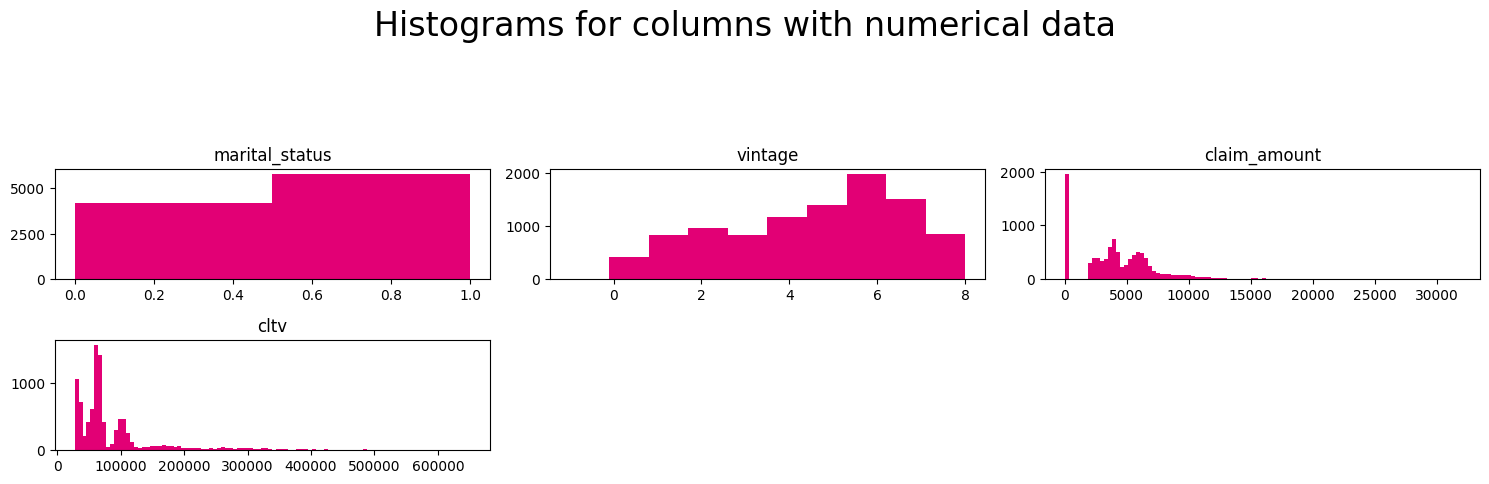

In [92]:
# HISTOGRAMS FOR COLUMNS WITH NUMERICAL DATA
ds_histograms = df.select_dtypes(include=['float64', 'int64'])

fig1 = plt.figure(1, figsize=(15, 12))
plt.suptitle('Histograms for columns with numerical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_histograms.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_histograms.columns.values[i])
    vals = np.size(ds_histograms.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(ds_histograms.iloc[:, i], bins=vals, color = '#e20075')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As per the histogram of numeric columns, for vintage the distribution of data is right-skewed, while for the claim_amount and cltv, the distribution of data is left-skewed.

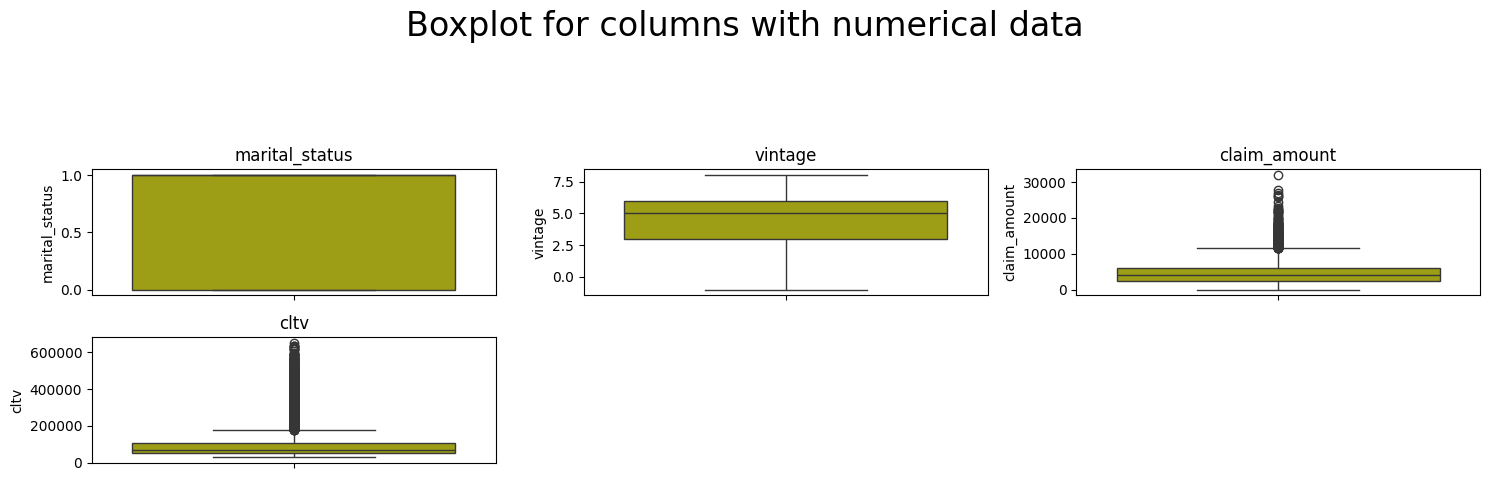

In [93]:
# BOXPLOT FOR COLUMNS WITH NUMERICAL DATA
fig2 = plt.figure(1, figsize=(15, 12))
plt.suptitle('Boxplot for columns with numerical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_histograms.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_histograms.columns.values[i])
    sns.boxplot(ds_histograms.iloc[:, i], orient="v", color = '#b3b300')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As per the boxplot of the numeric columns, there are more outliers in the claim_amount and cltv columns, as comparing with the vintage column.

Text(0.5, 1.0, 'Correlation with CLTV \n')

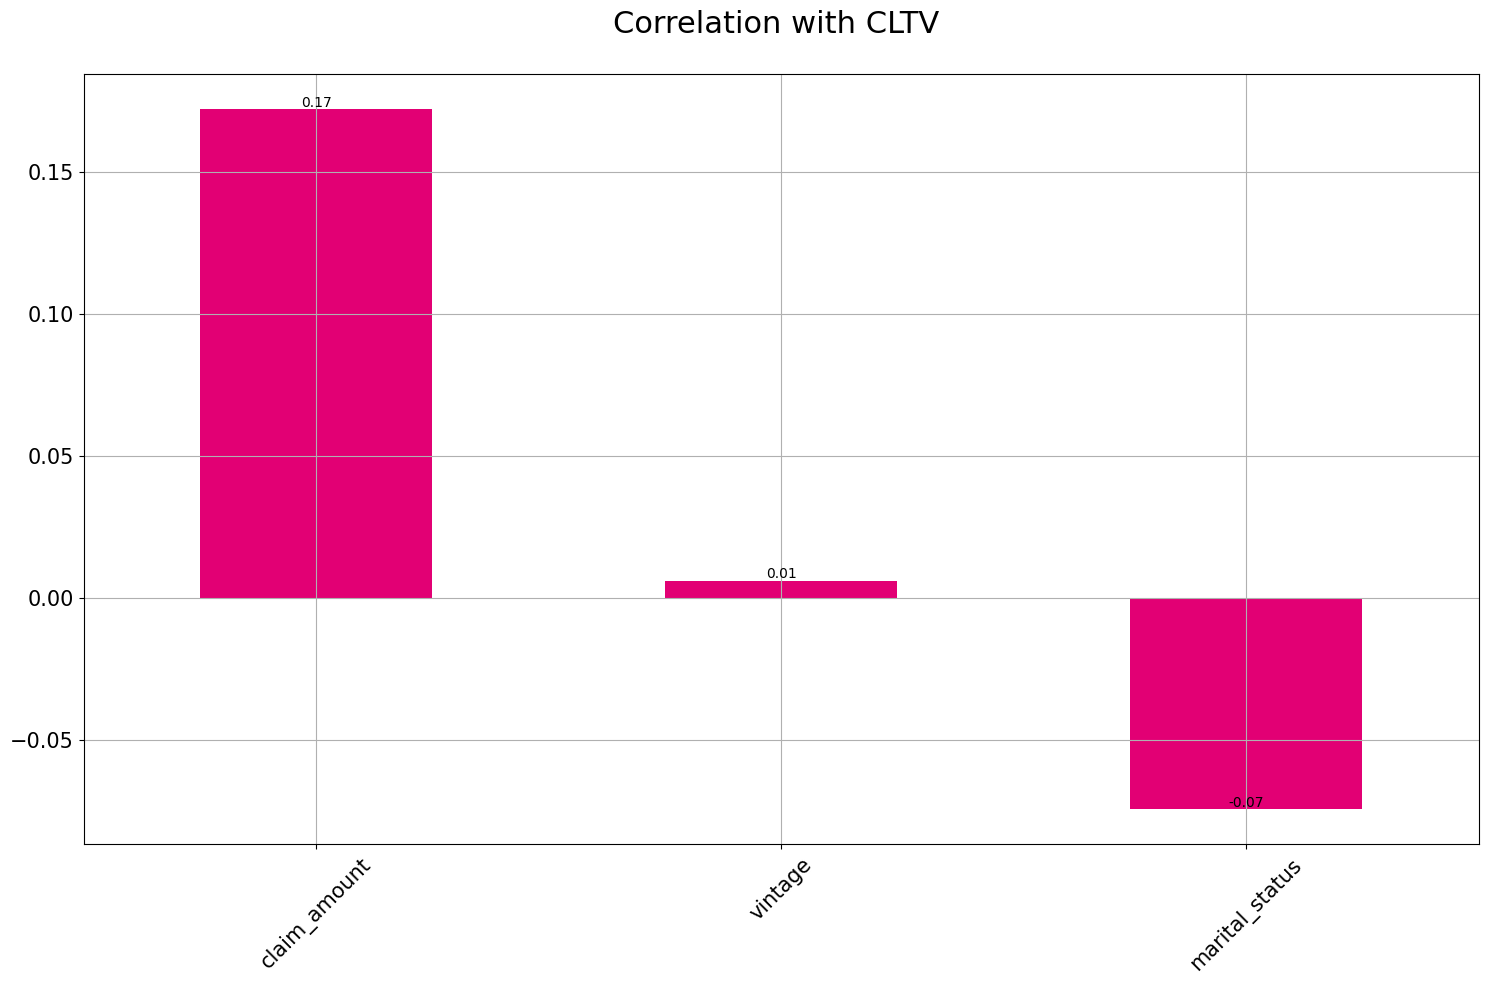

In [94]:
# correlation of numerical columns with cltv
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)

correlations = df.select_dtypes(include = ['float64', 'int64']).corr()['cltv'].sort_values(ascending = False)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)
# plot number or correlation values
for i in range(len(correlations)):
    plt.text(i, correlations[i], round(correlations[i], 2), ha = 'center', va = 'bottom')

plt.title('Correlation with CLTV \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

This is the correlation between other numeric columns and cltv. All numeric columns has a very weak correlation with cltv, even the strongest correlation is only 0.17.

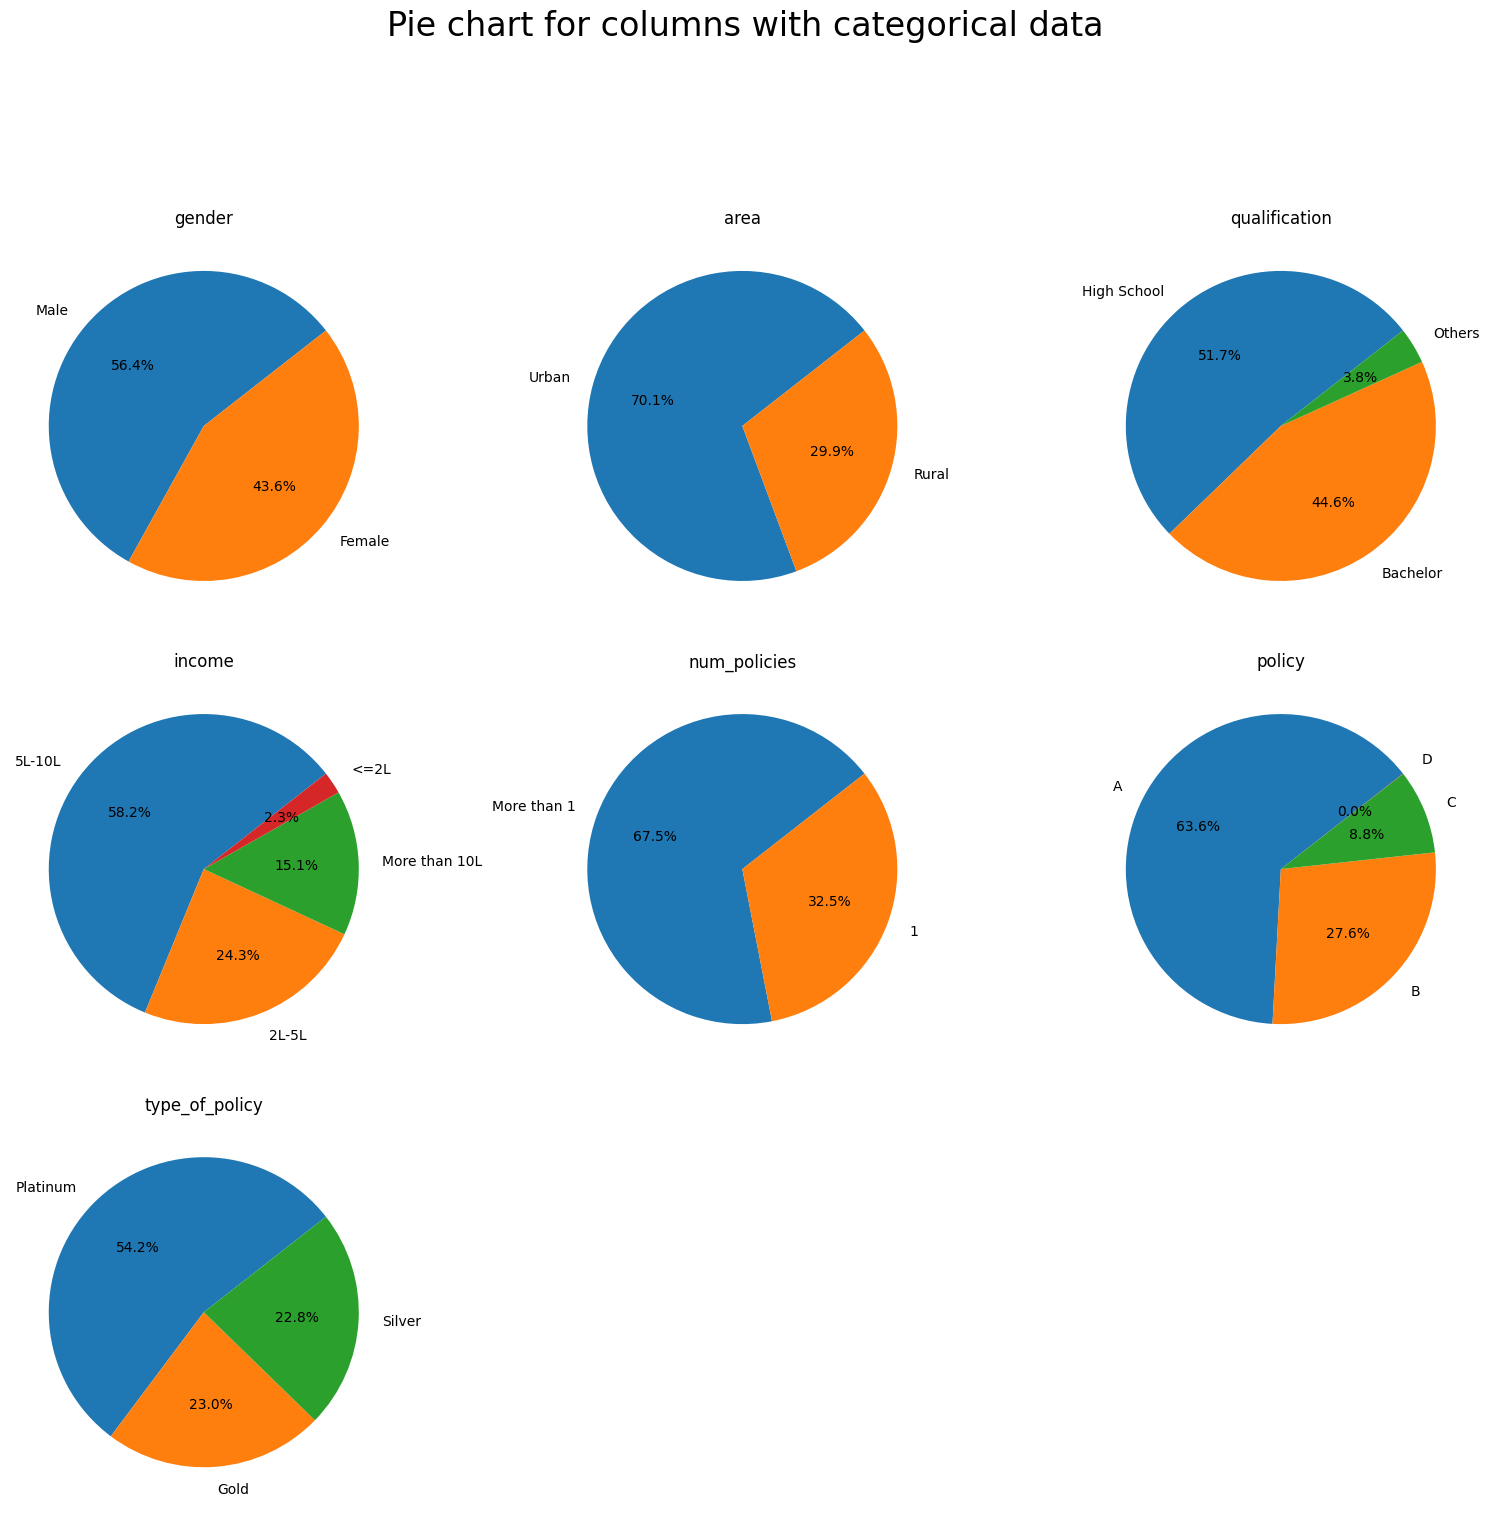

In [95]:
# pie chart for categorical data
ds_pie = df.select_dtypes(include=['object'])

fig3 = plt.figure(1, figsize=(15, 30))
plt.suptitle('Pie chart for columns with categorical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_pie.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_pie.columns.values[i])
    values = df[ds_pie.columns.values[i]].value_counts()
    index = values.index
    # adjust the lettering on the pie chart to be more readable
    plt.pie(values, labels = index, autopct='%1.1f%%', labeldistance=1.15, startangle = 38, textprops={'fontsize': 10})

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As per the pie chart of the categorical columns, here is the most common characteristics of the customers of this insurance company: Male customer living in Urban area, having a high school education, income between 5L - 10L, purchasing more than 1 plantinum A policy.

## Data Preprocessing

In [96]:
df.dtypes

gender             object
area               object
qualification      object
income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
policy             object
type_of_policy     object
cltv              float64
dtype: object

As per the dtype, there are 6 columns need to be transformed to numerical data type. For column gender, area, policy and qualification, as they are non-ordinal categorical data, we can use one-hot encoding to transform them. For column income, num_policies and type_of_policy, as they are ordinal categorical data, we can use label encoding to transform them.

#### One-hot encoding

Columns to perform one-hot encoding:
* gender
* area
* policy
* qualification

In [97]:
# replace df['gender'] with dummy variables
df = df.join(pd.get_dummies(df['gender']))
df = df.join(pd.get_dummies(df['area']))
df = df.join(pd.get_dummies(df['policy']))
df = df.join(pd.get_dummies(df['qualification']))
df = df.drop(['gender', 'area', 'policy', 'qualification'], axis=1)
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,0,1,0,1,1,0,0,0,1,0,0
1,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,0,1,1,0,1,0,0,0,0,1,0
2,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,0,1,0,1,1,0,0,0,1,0,0
3,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,1,0,1,0,1,0,0,0,0,1,0
4,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,0,1,0,1,1,0,0,0,0,1,0


In [98]:
# transform boolean to int
for i in range(0, len(df.columns)):
    if df.iloc[:, i].dtype == bool:
        df.iloc[:, i] = df.iloc[:, i].astype(int)
df.dtypes

income             object
marital_status    float64
vintage           float64
claim_amount      float64
num_policies       object
type_of_policy     object
cltv              float64
Female              uint8
Male                uint8
Rural               uint8
Urban               uint8
A                   uint8
B                   uint8
C                   uint8
D                   uint8
Bachelor            uint8
High School         uint8
Others              uint8
dtype: object

In [99]:
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others
0,5L-10L,1.0,5.0,5790.0,More than 1,Platinum,64308.0,0,1,0,1,1,0,0,0,1,0,0
1,5L-10L,0.0,8.0,5080.0,More than 1,Platinum,515400.0,0,1,1,0,1,0,0,0,0,1,0
2,5L-10L,1.0,8.0,2599.0,More than 1,Platinum,64212.0,0,1,0,1,1,0,0,0,1,0,0
3,5L-10L,0.0,7.0,0.0,More than 1,Platinum,97920.0,1,0,1,0,1,0,0,0,0,1,0
4,More than 10L,1.0,6.0,3508.0,More than 1,Gold,59736.0,0,1,0,1,1,0,0,0,0,1,0


#### Ordinal encoding

In [100]:
# transform type_of_policy to numeric
# display value_counts
df['type_of_policy'].value_counts()

Platinum    5395
Gold        2285
Silver      2272
Name: type_of_policy, dtype: int64

In [101]:
# silver = 0, gold = 1, platinum = 2
df['type_of_policy'] = df['type_of_policy'].map({'Silver': 0, 'Gold': 1, 'Platinum': 2})
df['type_of_policy'].value_counts()

2    5395
1    2285
0    2272
Name: type_of_policy, dtype: int64

In [102]:
# transform num_policies to numeric
# display value_counts
df['num_policies'].value_counts()

More than 1    6719
1              3233
Name: num_policies, dtype: int64

In [103]:
# map more than 1 policy to 1, 1 policy to 0
df['num_policies'] = df['num_policies'].map({'1': 0, 'More than 1':1})
df['num_policies'].value_counts()

1    6719
0    3233
Name: num_policies, dtype: int64

In [104]:
# transform income column to numeric
# discover unique values in income column first
df['income'].value_counts()

5L-10L           5797
2L-5L            2417
More than 10L    1507
<=2L              231
Name: income, dtype: int64

Encoding the df['income'] column to numerical data type, e.g. '<=2L' to 1, '2L-5L' to 2.

In [105]:
# encode income column
df['income'] = df['income'].map({'<=2L': 0, '2L-5L': 1, '5L-10L': 2, 'More than 10L': 3})
df['income'].value_counts()

2    5797
1    2417
3    1507
0     231
Name: income, dtype: int64

In [106]:
# rearrange columns: cltv to the end
cols = list(df.columns)
cols.remove('cltv')
cols.append('cltv')
df = df[cols]
df.head()

,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,Female,Male,Rural,Urban,A,B,C,D,Bachelor,High School,Others,cltv
0,2,1.0,5.0,5790.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64308.0
1,2,0.0,8.0,5080.0,1,2,0,1,1,0,1,0,0,0,0,1,0,515400.0
2,2,1.0,8.0,2599.0,1,2,0,1,0,1,1,0,0,0,1,0,0,64212.0
3,2,0.0,7.0,0.0,1,2,1,0,1,0,1,0,0,0,0,1,0,97920.0
4,3,1.0,6.0,3508.0,1,1,0,1,0,1,1,0,0,0,0,1,0,59736.0


### Outlier detection and removal:

We can use the z score to detect the outliers. If the z score is greater than 3, we can remove the outliers, as per the normal distribution, 99.7% of the data should be within 3 standard deviations from the mean.

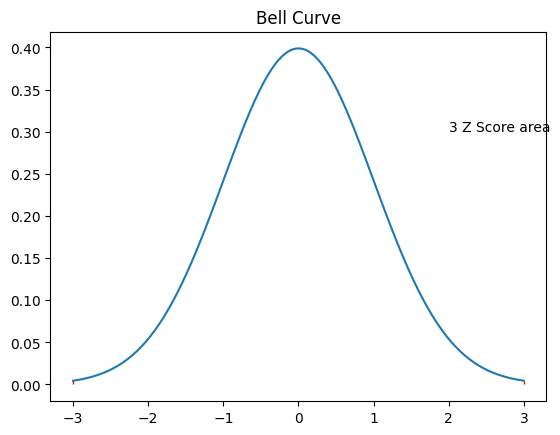

In [107]:
# use a bell curve to visualize the concept of 3 z score of normal distribution
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# red area as abs z score > 3
plt.fill_between(x, 0, stats.norm.pdf(x, mu, sigma), where = abs(x) >= 3, color = 'red')
# label the red area
plt.text(2, 0.3, '3 Z Score area', fontsize = 10)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Bell Curve')
plt.show()

In [108]:
# remove outliers in which z > 3
from scipy.stats import zscore
z = np.abs(zscore(df))
# threshold = 3
threshold = 3
df = df[(z < 3).all(axis=1)]
df.shape

(8367, 18)

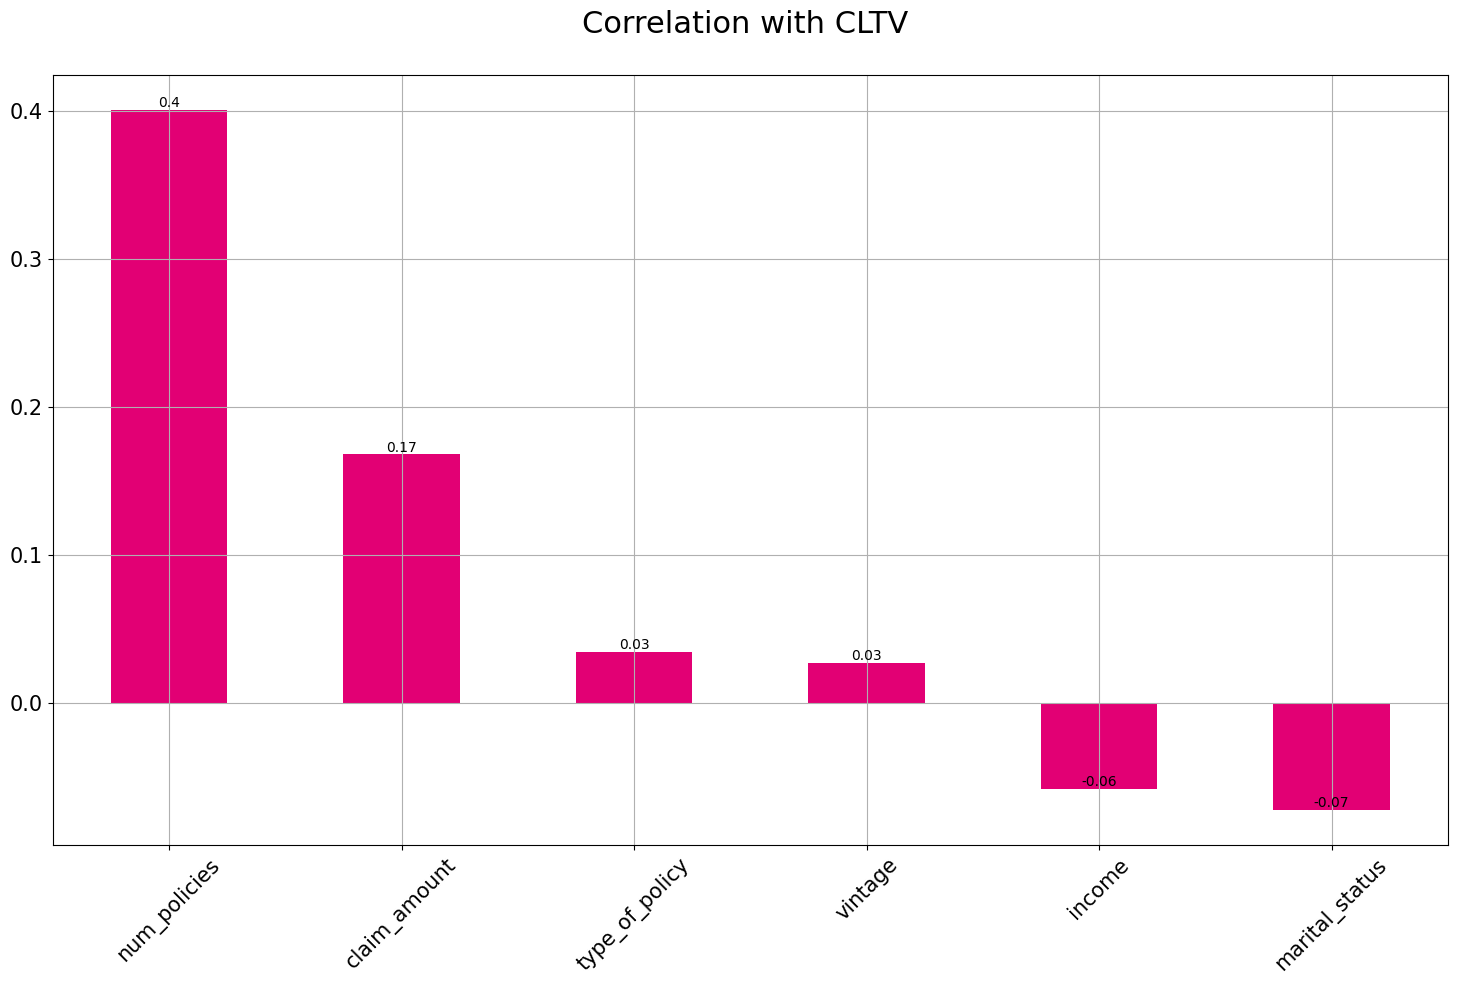

In [109]:
# correlation of numerical columns with cltv
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)

correlations = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()['cltv'].sort_values(ascending = False)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)
# plot number or correlation values
for i in range(len(correlations)):
    plt.text(i, correlations[i], round(correlations[i], 2), ha = 'center', va = 'bottom')
plt.title('Correlation with CLTV \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

As per the correlation analysis of numerical columns, column 'Bachelor', 'High School', 'C', 'D' and 'Others' have nearly no correlation with the target column 'cltv'. We can consider to remove these columns from generating the linear regression model of predicting the cltv.

In [110]:
df = df.drop(['Bachelor', 'High School', 'C', 'D', 'Others'], axis = 1)

In [111]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

calculate_vif(df.iloc[:, :-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,Variable Inflation Factors
0,income,1.102359
1,marital_status,1.026743
2,vintage,1.012656
3,claim_amount,1.381137
4,num_policies,1.038719
5,type_of_policy,1.013380
6,Female,inf
7,Male,inf
8,Rural,inf
9,Urban,inf


As per the multicollearity analysis of numerical columns, column 'Rural' & 'Urban', 'A' & 'B'. 'Female' & 'Male' have high correlation. We can consider to remove one of the columns from each pair to avoid multicollinearity.

In [112]:
df = df.drop(['Rural', 'A', 'Female'], axis = 1)

In [113]:
calculate_vif(df.iloc[:, :-1])

,variables,Variable Inflation Factors
0,income,5.523061
1,marital_status,2.283525
2,vintage,4.615478
3,claim_amount,3.961098
4,num_policies,3.050275
5,type_of_policy,3.425268
6,Male,2.242019
7,Urban,4.112689
8,B,1.461299


Before using the regression model to predict the cltv, as different columns have different scales, we can use min-max scaling to scale the columns to the same scale with maximum value of 1 and minimum value of 0. This can help the model to converge faster.

## Predict customer lifetime value via linear regression models

In [114]:
# import libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [115]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# add back column names
X = pd.DataFrame(X, columns = df.columns[:-1])

In order to predict the customer lifetime value, we can use the linear regression model to predict the cltv. We can use the train_test_split to split the data into training and testing data. We can use the training data to train the model and use the testing data to evaluate the model.

In [116]:
X = df.iloc[:, :-1] # X is the feature attributes
y = df.iloc[:, -1] # y is cltv, the target variable

# split data into train and test, test size = 0.3, random_state = 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### Model 1: Simple linear regression model

In [117]:
# train a simple linear regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [118]:
#MSE and R2
y_pred_1 = linear.predict(X_test)
mse_insample_1 = mean_squared_error(y_train, linear.predict(X_train))
mse_outsample_1 = mean_squared_error(y_test, y_pred_1)
r2_insample_1 = r2_score(y_train, linear.predict(X_train))
r2_outsample_1 = r2_score(y_test, y_pred_1)

print('MSE in-sample:', mse_insample_1)
print('MSE out-sample:', mse_outsample_1)
print('R2 in-sample:', r2_insample_1)
print('R2 out-sample:', r2_outsample_1)

MSE in-sample: 3316216289.8726454
MSE out-sample: 3735366623.968383
R2 in-sample: 0.177452007563367
R2 out-sample: 0.17569013427933078


Text(0.5, 1.0, 'Actual vs Predicted')

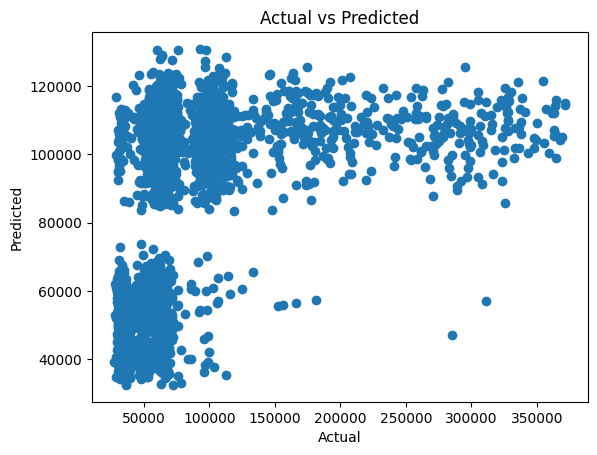

In [119]:
# plot the predicted vs actual values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### Model 2: Bayesian Ridge Regression model

In [120]:
# bayesian ridge regression
from sklearn.linear_model import BayesianRidge
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)

BayesianRidge()

In [121]:
#MSE and R2
y_pred_2 = bayesian.predict(X_test)
mse_insample_2 = mean_squared_error(y_train, bayesian.predict(X_train))
mse_outsample_2 = mean_squared_error(y_test, y_pred_2)
r2_insample_2 = r2_score(y_train, bayesian.predict(X_train))
r2_outsample_2 = r2_score(y_test, y_pred_2)

print('MSE in-sample:', mse_insample_2)
print('MSE out-sample:', mse_outsample_2)
print('R2 in-sample:', r2_insample_2)
print('R2 out-sample:', r2_outsample_2)

MSE in-sample: 3905358802.3011436
MSE out-sample: 4433763850.143909
R2 in-sample: 0.031322217315051915
R2 out-sample: 0.021569861309491123


Text(0.5, 1.0, 'Actual vs Predicted')

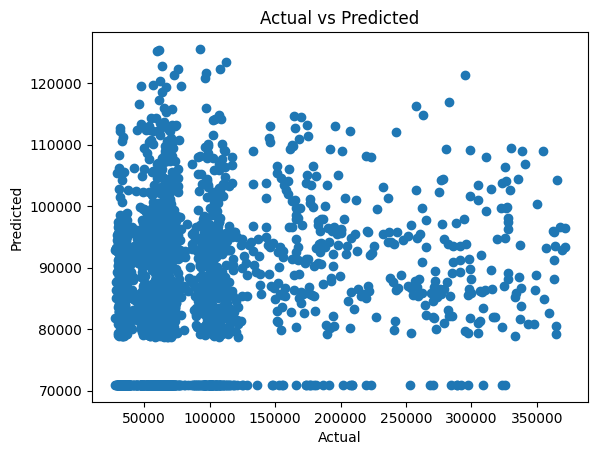

In [122]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### Model 3: Lasso regression model

In [123]:
# lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [124]:
# MSE and R2
y_pred_3 = lasso.predict(X_test)
mse_insample_3 = mean_squared_error(y_train, lasso.predict(X_train))
mse_outsample_3 = mean_squared_error(y_test, y_pred_3)
r2_insample_3 = r2_score(y_train, lasso.predict(X_train))
r2_outsample_3 = r2_score(y_test, y_pred_3)

print('MSE in-sample:', mse_insample_3)
print('MSE out-sample:', mse_outsample_3)
print('R2 in-sample:', r2_insample_3)
print('R2 out-sample:', r2_outsample_3)

MSE in-sample: 3316216290.1101637
MSE out-sample: 3735367195.225251
R2 in-sample: 0.17745200750445345
R2 out-sample: 0.17569000821602299


Text(0, 0.5, 'Predicted')

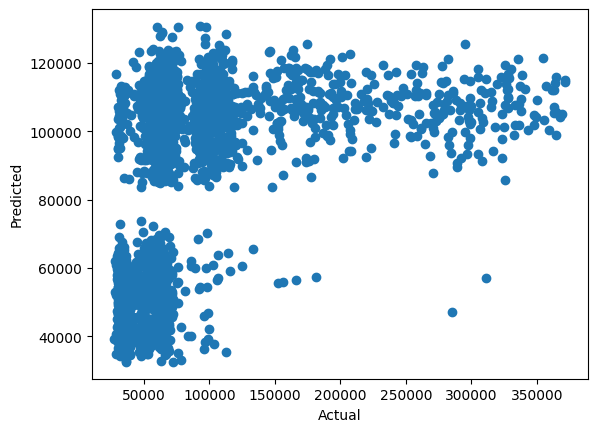

In [125]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Model 4: Ridge regression model

In [126]:
# ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [127]:
# MSE and R2
y_pred_4 = ridge.predict(X_test)
mse_insample_4 = mean_squared_error(y_train, ridge.predict(X_train))
mse_outsample_4 = mean_squared_error(y_test, y_pred_4)
r2_insample_4 = r2_score(y_train, ridge.predict(X_train))
r2_outsample_4 = r2_score(y_test, y_pred_4)

print('MSE in-sample:', mse_insample_4)
print('MSE out-sample:', mse_outsample_4)
print('R2 in-sample:', r2_insample_4)
print('R2 out-sample:', r2_outsample_4)

MSE in-sample: 3316216293.4834332
MSE out-sample: 3735377377.2318788
R2 in-sample: 0.17745200666775407
R2 out-sample: 0.1756877612803508


Text(0.5, 1.0, 'Actual vs Predicted')

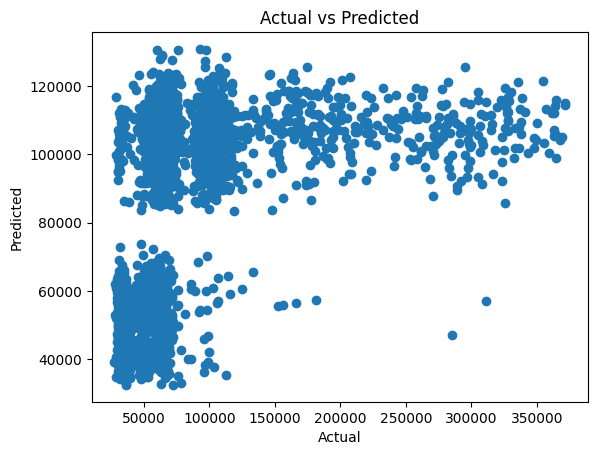

In [128]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### Model 5: Polynomial Regression model

In [129]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [130]:
# train a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [131]:
# MSE and R2
y_pred_5 = poly_reg.predict(X_test_poly)
mse_insample_5 = mean_squared_error(y_train, poly_reg.predict(X_train_poly))
mse_outsample_5 = mean_squared_error(y_test, y_pred_5)
r2_insample_5 = r2_score(y_train, poly_reg.predict(X_train_poly))
r2_outsample_5 = r2_score(y_test, y_pred_5)

print('MSE in-sample:', mse_insample_5)
print('MSE out-sample:', mse_outsample_5)
print('R2 in-sample:', r2_insample_5)
print('R2 out-sample:', r2_outsample_5)

MSE in-sample: 3267729368.3738885
MSE out-sample: 3745647352.9674044
R2 in-sample: 0.18947861151559797
R2 out-sample: 0.17342141284076662


Text(0.5, 1.0, 'Actual vs Predicted')

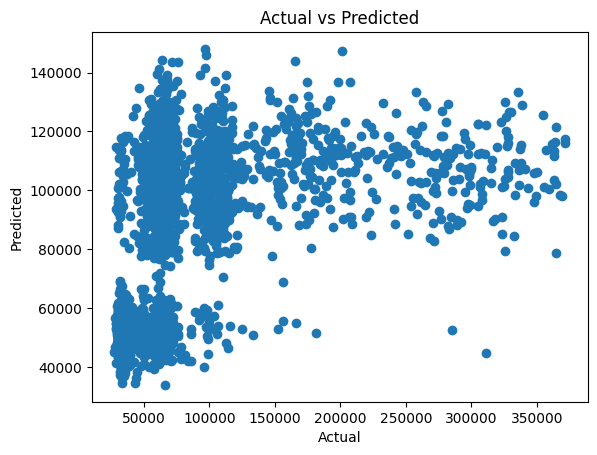

In [132]:
# plot the predicted vs actual values
plt.scatter(y_test, y_pred_5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

## Model evaluation

By using the mean squared error, we can compare the model performance of different types of linear regression models, including:
* Model 1: Simple linear regression model
* Model 2: Bayesian Ridge Regression model
* Model 3: Lasso regression model
* Model 4: Ridge regression model
* Model 5: Polynomial Regression model

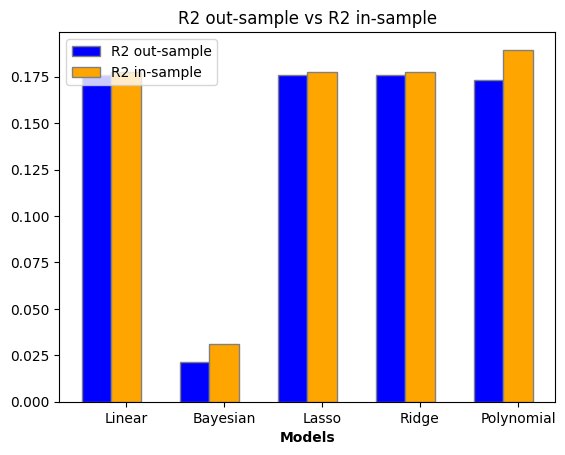

In [133]:
# rank the models based on R2 out-sample
r2_outsample = [r2_outsample_1, r2_outsample_2, r2_outsample_3, r2_outsample_4, r2_outsample_5]
r2_insample = [r2_insample_1, r2_insample_2, r2_insample_3, r2_insample_4, r2_insample_5]
models = ['Linear', 'Bayesian', 'Lasso', 'Ridge', 'Polynomial']
barWidth = 0.3
r1 = np.arange(len(r2_outsample))
r2 = [x + barWidth for x in r1]
plt.bar(r1, r2_outsample, color = 'blue', width = barWidth, edgecolor = 'grey', label = 'R2 out-sample')
plt.bar(r2, r2_insample, color = 'orange', width = barWidth, edgecolor = 'grey', label = 'R2 in-sample')
plt.xlabel('Models', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(r2_outsample))], models)
plt.title('R2 out-sample vs R2 in-sample')
plt.legend()
plt.show()

Text(0.5, 0, 'Models')

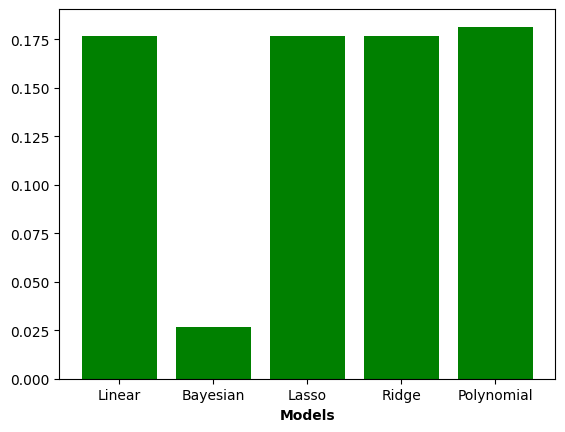

In [134]:
# rank the models based on Mean of R2 score
r2_mean = [(r2_insample_1 + r2_outsample_1)/2, (r2_insample_2 + r2_outsample_2)/2, (r2_insample_3 + r2_outsample_3)/2, (r2_insample_4 + r2_outsample_4)/2,
             (r2_insample_5 + r2_outsample_5)/2]
plt.bar(models, r2_mean, color = 'green')
plt.xlabel('Models', fontweight = 'bold')

Since the mean squared error of the polynomial regression model is the lowest, we can consider to use the polynomial regression model to predict the cltv.

### Observations and Suggestions

In [135]:
# coefficients of the best model
coef = pd.DataFrame(list(zip(X, poly_reg.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,income,0.000024
1,marital_status,22086.386995
2,vintage,753.571231
3,claim_amount,552.962045
4,num_policies,2.662416
5,type_of_policy,19975.291673
6,Male,2369.729125
7,Urban,-2242.938463
8,B,121.348532


As per the coefficient of determination of the polynomial regression model, we can observe that the vintage of the policy has the highest coefficient of determination, which means that the vintage of the policy has the highest impact on the customer lifetime value. The second highest coefficient of determination is marital status and type of policy. <b> A customer having a policy with a longer vintage, married and a policy type of 'Platinum' will have a higher customer lifetime value. </b>

A non-sense coefficient of determination is 'income', as the coefficient of determination is negative, which means that the higher the income, the lower the customer lifetime value, which is not making sense.

Suggestions:
* As married customers have a higher customer lifetime value, the insurance company can consider to provide more benefits to the married customers, e.g. providing a family discount.
* As the vintage of the policy has a high impact on the customer lifetime value, the insurance company can consider to provide more benefits to the customers who have a longer vintage of the policy, e.g. providing a loyalty discount.
* Differenciate the platinum policy from the other types of policy, e.g. doubling the warranty period of the platinum policy and prioritizing the platinum policy customers in the customer service queue, so as to encourage the customers to purchase the platinum policy.

#### Limitations:

The results of the linear regression model are based on the assumption that the relationship between the independent variables and the dependent variable is linear. If the relationship is non-linear, the linear regression model may not be able to capture the relationship. As per the R2 score of all the models, the R2 score is low, which means that the linear regression model is not able to capture the relationship between the independent variables and the dependent variable well. The model may not be able to predict the customer lifetime value accurately.

